In [1]:
###################################Homework 3 Write-up##########################
########Kaggle Username: oortega20#############################################

import pandas as pd
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import multivariate_normal
from numpy import linalg as LA
%matplotlib inline

In [2]:
#I certify
#that all solutions are entirely in my own words and that I have not looked at another
#student’s solutions. I have given credit to all external sources I consulted. - Oscar Ortega""""""




MNIST_PATH = 'mnist-data\mnist_data.mat'
SPAM_PATH = 'spam-data\spam_data.mat'
MNIST = sio.loadmat(MNIST_PATH)
SPAM = sio.loadmat(SPAM_PATH)



def plot_iso(mu, Sigma, x, y):   
    rv = multivariate_normal(mu, Sigma)
    delta = .01
    x, y = np.mgrid[-x + mu[0] :x + mu[0]: delta, -y + mu[1] :y + mu[1]:delta]
    pos = np.dstack((x, y))

    fig = plt.figure()
    ax = fig.add_subplot(111)


    contours = ax.contour(x, y, rv.pdf(pos))
    contours.clabel()
    return contours, ax

def plot_2iso(mu_1, mu_2, sigma_1, sigma_2, x, y):
    delta = .01
    rv_1 = multivariate_normal(mu_1, sigma_1)
    rv_2 = multivariate_normal(mu_2, sigma_2)
    x_mean  = (mu_1[0] + mu_2[0]) / 2
    y_mean = (mu_1[1] + mu_2[1])/ 2
    x, y = np.mgrid[-x + x_mean:x + x_mean: delta, -y + y_mean : y + y_mean:delta]
    pos = np.dstack((x, y))

    fig = plt.figure()
    ax = fig.add_subplot(111)


    contours = ax.contour(x, y, rv_1.pdf(pos) - rv_2.pdf(pos))
    contours.clabel()
    return contours, ax

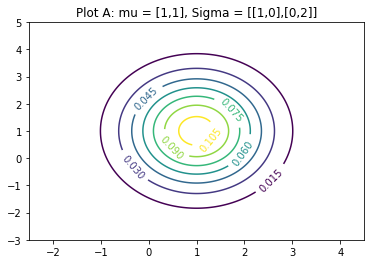

In [3]:
#########################Problem 2#############################################
#Isocontours of Normal Distributions

mu_1 = [1,1]
Sigma_1 = [[1, 0], [0,2]]
cs, ax = plot_iso(mu_1, Sigma_1, 3.5, 4)
ax.set_title('Plot A: mu = [1,1], Sigma = [[1,0],[0,2]]')
plt.show()

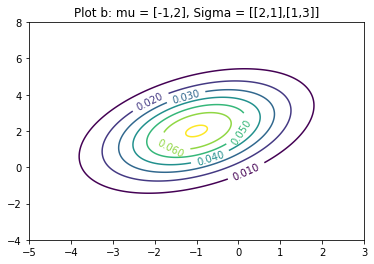

In [4]:
mu_2 = [-1, 2]
Sigma_2 = [[2,1],[1,3]]
cs2, ax2 = plot_iso(mu_2, Sigma_2, 4, 6)
ax2.set_title('Plot b: mu = [-1,2], Sigma = [[2,1],[1,3]]')
plt.show()

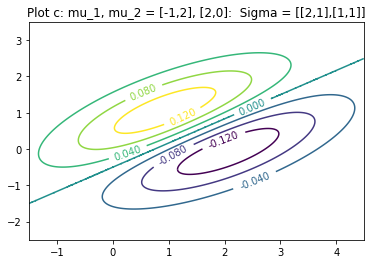

In [5]:
mu_3 = [-1,2]
mu_4 = [2,0]
Sigma_3 = [[2,1],[1,1]]
cs3, ax3 = plot_2iso(mu_1, mu_4, Sigma_3, Sigma_3, 3, 3)
ax3.set_title('Plot c: mu_1, mu_2 = [-1,2], [2,0]:  Sigma = [[2,1],[1,1]]')
plt.show()

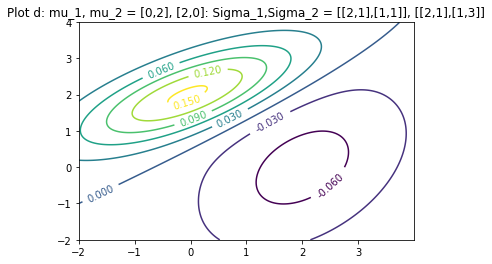

In [6]:
mu_5 = [0,2]
mu_6 = [2,0]
Sigma_4 = [[2,1],[1,1]]
Sigma_5 = [[2,1],[1,3]]
cs4, ax4 = plot_2iso(mu_5, mu_6, Sigma_4, Sigma_5, 3, 3)
ax4.set_title('Plot d: mu_1, mu_2 = [0,2], [2,0]: Sigma_1,Sigma_2 = [[2,1],[1,1]], [[2,1],[1,3]]')
plt.show()

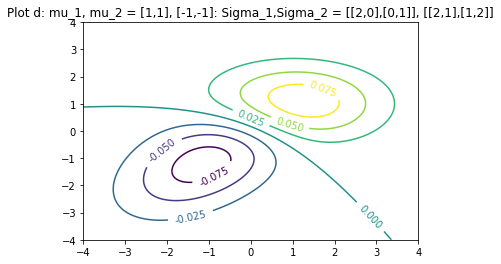

In [7]:
mu_7 = [1,1]
mu_8 = [-1,-1]
Sigma_6 = [[2,0],[0,1]]
Sigma_7 = [[2,1],[1,2]]
cs5, ax5 = plot_2iso(mu_7, mu_8, Sigma_6, Sigma_7, 4, 4)
ax5.set_title('Plot d: mu_1, mu_2 = [1,1], [-1,-1]: Sigma_1,Sigma_2 = [[2,0],[0,1]], [[2,1],[1,2]]')
plt.show()

In [8]:
###########################Problem 3#############################################
#A
seed = 10
np.random.seed(seed)
n = 100

x_1 = np.random.normal(3, 3, n)
x_2 = (x_1 / 2) + np.random.normal(4, 2, n)

samples = np.array([x_1, x_2])

mean = np.mean(samples, axis = 1)
print("mean: ", mean)
#B

samples = np.array([x_1, x_2])
cov = np.cov(samples)
print("cov: \n", cov)

#C
nums, vectors = LA.eig(cov)
print("eig vals: ", nums)
print("vectors: \n", vectors)

mean:  [3.23824999 5.75751936]
cov: 
 [[8.50150318 4.62655915]
 [4.62655915 6.42395033]]
eig vals:  [12.20446758  2.72098593]
vectors: 
 [[ 0.78072745 -0.62487171]
 [ 0.62487171  0.78072745]]


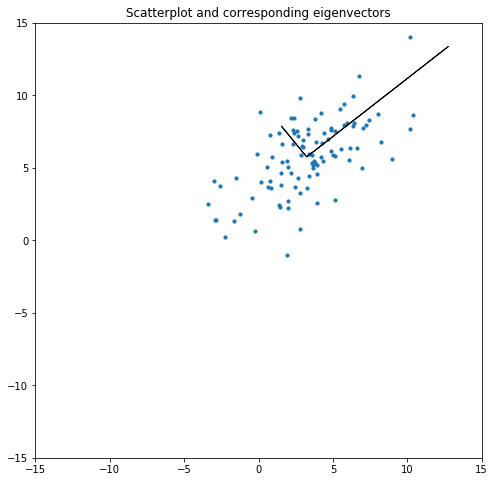

In [9]:
#D
#(i)
plt.figure(figsize=(8,8))
plt.scatter(x_1, x_2, s=10)
plt.ylim((-15,15))
plt.xlim((-15,15))
#(ii)
x, y = mean[0], mean[1]
for i in range(2):
    delta = nums[i] * vectors[:,i]
    plt.arrow(x, y, delta[0] , delta[1])
plt.title('Scatterplot and corresponding eigenvectors')
plt.show()

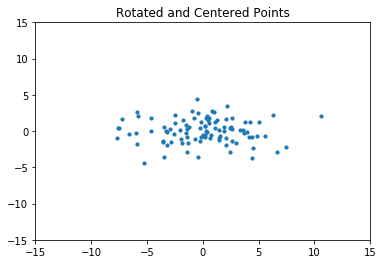

In [10]:
#e
plt.ylim((-15,15))
plt.xlim((-15,15))

U_T = vectors.T
rotated = U_T @ (samples - mean.reshape((2,1)))
plt.scatter(rotated[0], rotated[1], s=10)
plt.ylim((-15,15))
plt.xlim((-15,15))
plt.title('Rotated and Centered Points')
plt.show()

In [11]:
#######################################Problem 7#################################################################################
################Gaussian Classifiers for Digits and Spam############################
m_train_data, m_train_labels = MNIST['training_data'], MNIST['training_labels']
s_train_data, s_train_labels = SPAM['training_data'], SPAM['training_labels']

In [12]:
##########PART A#######
epsilon = .001
def fit_gaussians(data, labels, epsilon):  
    classes = np.unique(labels)
    gaussians = {}
    for row in data:
        row = row / np.linalg.norm(row)
    for c in classes:
        class_data = []
        for i in range(len(labels)):
            if labels[i] == c:
                class_data.append(data[i])
        class_data = np.array(class_data)
        #print(class_data.shape, 'data matrix')
        class_mean = np.mean(class_data, axis = 0)
        class_cov = np.cov(class_data, rowvar = False, bias = True)
        dim = class_cov.shape[0]
        #print('dim', dim, '784')
        num_samples = len(class_data)
        if LA.matrix_rank(class_cov) < dim:
            class_cov = class_cov + (epsilon * np.eye(dim))
        prior = np.log(float(num_samples / len(data)))
        pdf = multivariate_normal(class_mean, class_cov)
        gaussians[c] = (pdf, prior)

    return gaussians

In [13]:
mnist_pdfs = fit_gaussians(m_train_data, m_train_labels, epsilon)


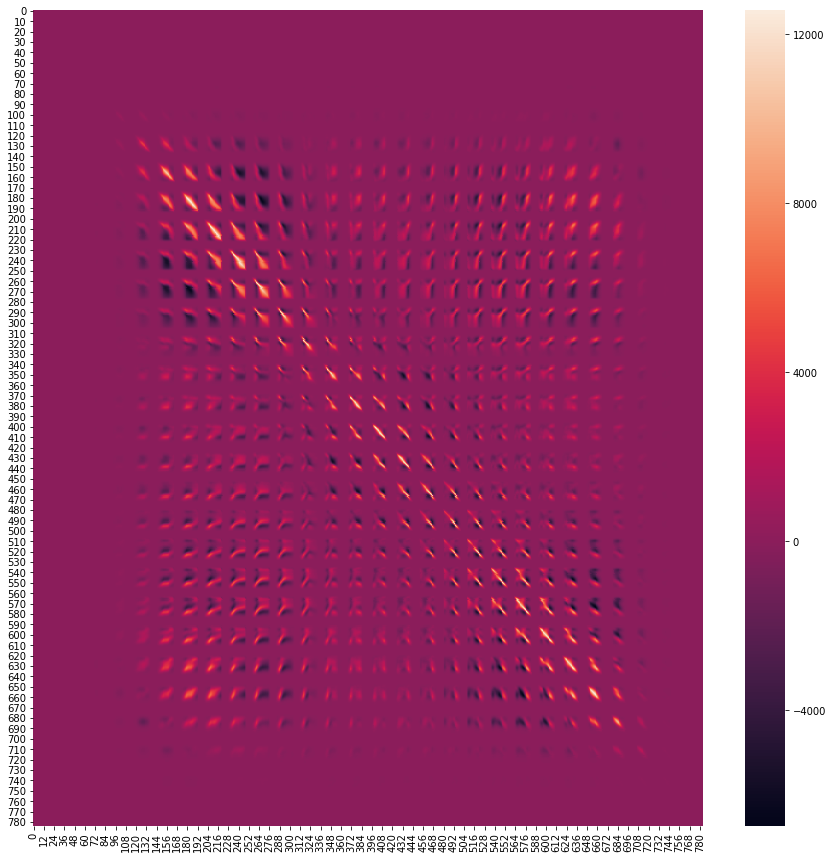

In [14]:
#part b
################Choosing for class 5############################################
plt.figure(figsize = (15,15))
ax = sns.heatmap(mnist_pdfs[5][0].cov)

It turns out that the diagonal entries of the covariance matrix have much higher values then the off diagonal terms. Although pixels that are far apart tend to negatively corelated. Most of the digits in the middle tend to be uncorrelated, which is probably due to how the images don't have much information at the borders.

In [15]:


def GDA(data, gaussians, lda, epsilon):
    how_many = 0
    labels = []
    if lda:  
        sums = np.zeros(gaussians[0][0].cov.shape)

        for pdf in gaussians.keys():
            sums = sums + gaussians[pdf][0].cov
        
        sums = sums / len(gaussians)
        for pdf in gaussians.keys():
            gaussians[pdf][0].cov = sums

    for sample in data:
        how_many += 1
        if how_many % 1000 == 0:
            print(how_many, 'predictions for data classified')
        GDA_vals = [] 
        for cl in sorted(gaussians.keys()):
            log_post, log_prior = gaussians[cl][0].logpdf(sample), gaussians[cl][1]
            GDA_vals.append(log_post + log_prior)
        GDA_vals = np.array(GDA_vals)
        labels.append(np.argmax(GDA_vals))
    return labels

In [16]:
###########################Part C###############################################
train_size = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]

v_split = 10000
epsilon = 0.001
data_labels = list(zip(m_train_data, m_train_labels))
np.random.shuffle(data_labels)
data, labels = [],[]

for d, cs in data_labels:
    data.append(d)
    labels.append(cs[0])

data, labels = np.array(data), np.array(labels)
t_data, t_labels = data[v_split:], labels[v_split:]
val_data, val_labels = data[:v_split], labels[:v_split]

classes = np.unique(val_labels)
#predictions
t_pred_q, t_pred_l = {}, {}
v_pred_q, v_pred_l = {}, {}
#error rates for each digit
t_c_error_l, t_c_error_q = {},{}
v_c_error_l, v_c_error_q = {},{}
#total rates
t_rates_l, v_rates_l = [], []
t_rates_q, v_rates_q = [], []

for cs in classes:
    t_pred_q[cs] = []
    t_pred_l[cs] = []
    v_pred_q[cs] = []
    v_pred_l[cs] = []
    t_c_error_l[cs] = []
    t_c_error_q[cs] = []
    v_c_error_l[cs] = []
    v_c_error_q[cs] = []

for split in train_size:
    print(split, ': this is the iteration we are performing')
    print('Performing LDA')
    s_data = t_data[:split] 
    s_labels = t_labels[:split].reshape((-1,1))
    mnist_pdfs = fit_gaussians(s_data, s_labels, epsilon)
    lda = True
    t_labels_l = GDA(s_data, mnist_pdfs, lda, epsilon)
    v_labels_l = GDA(val_data, mnist_pdfs, lda, epsilon)
    lda = False
    print('Now performing QDA')
    t_labels_q = GDA(s_data, mnist_pdfs, lda, epsilon)
    v_labels_q = GDA(val_data, mnist_pdfs, lda, epsilon)
    
    for p_label, label in zip(t_labels_l, s_labels.reshape(-1,).tolist()):
        t_pred_l[label].append((label, p_label))
    
    for p_label, label in zip(t_labels_q, s_labels.reshape(-1,).tolist()):
        t_pred_q[label].append((label, p_label))
    
    t_l, t_q = 0, 0
    for label in classes:
        t_c_l, t_c_q = 0,0
        for c in t_pred_l[label]:
            if c[0] != c[1]:
                t_c_l += 1
        for c in t_pred_q[label]:
            if c[0] != c[1]:
                t_c_q += 1
        if len(t_pred_l[label]):
            t_c_error_l[label].append(float(t_c_l / len(t_pred_l[label])))
        if len(t_pred_q[label]):
            t_c_error_q[label].append(float(t_c_q / len(t_pred_q[label])))
        t_l += t_c_l
        t_q += t_c_q
    
    t_rates_l.append(t_l / split)
    t_rates_q.append(t_q / split)
    
    for p_label, label in zip(v_labels_l, val_labels.reshape(-1,).tolist()):
        v_pred_l[label].append((label, p_label))
    
    for p_label, label in zip(v_labels_q, val_labels.reshape(-1,).tolist()):
        v_pred_q[label].append((label, p_label))
        
    v_l, v_q = 0, 0
    for label in mnist_pdfs.keys():
        v_c_l, v_c_q = 0,0
        for c in v_pred_l[label]:
            if c[0] != c[1]:
                v_c_l += 1
        for c in v_pred_q[label]:
            if c[0] != c[1]:
                v_c_q += 1
        if len(v_pred_l[label]):
            v_c_error_l[label].append(float(v_c_l / len(v_pred_l[label])))
        if len(v_pred_q[label]):
            v_c_error_q[label].append(float(v_c_q / len(v_pred_q[label])))
        v_l += v_c_l
        v_q += v_c_q
    
    v_rates_l.append(v_l / split)
    v_rates_q.append(v_q / split)
    

100 : this is the iteration we are performing
Performing LDA
1000 predictions for data classified
2000 predictions for data classified
3000 predictions for data classified
4000 predictions for data classified
5000 predictions for data classified
6000 predictions for data classified
7000 predictions for data classified
8000 predictions for data classified
9000 predictions for data classified
10000 predictions for data classified
Now performing QDA
1000 predictions for data classified
2000 predictions for data classified
3000 predictions for data classified
4000 predictions for data classified
5000 predictions for data classified
6000 predictions for data classified
7000 predictions for data classified
8000 predictions for data classified
9000 predictions for data classified
10000 predictions for data classified
200 : this is the iteration we are performing
Performing LDA
1000 predictions for data classified
2000 predictions for data classified
3000 predictions for data classified
4000 p

29000 predictions for data classified
30000 predictions for data classified
1000 predictions for data classified
2000 predictions for data classified
3000 predictions for data classified
4000 predictions for data classified
5000 predictions for data classified
6000 predictions for data classified
7000 predictions for data classified
8000 predictions for data classified
9000 predictions for data classified
10000 predictions for data classified
Now performing QDA
1000 predictions for data classified
2000 predictions for data classified
3000 predictions for data classified
4000 predictions for data classified
5000 predictions for data classified
6000 predictions for data classified
7000 predictions for data classified
8000 predictions for data classified
9000 predictions for data classified
10000 predictions for data classified
11000 predictions for data classified
12000 predictions for data classified
13000 predictions for data classified
14000 predictions for data classified
15000 predi

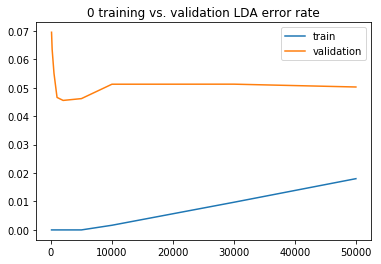

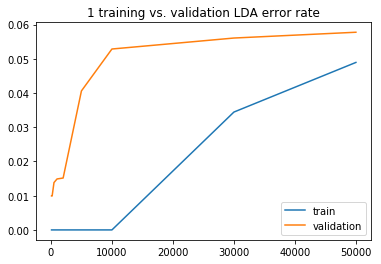

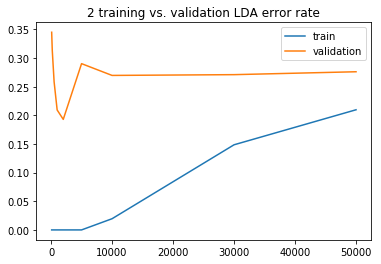

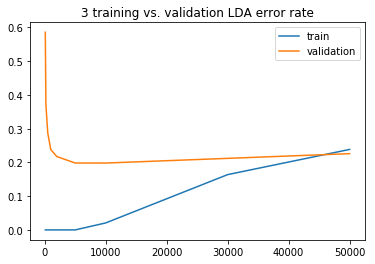

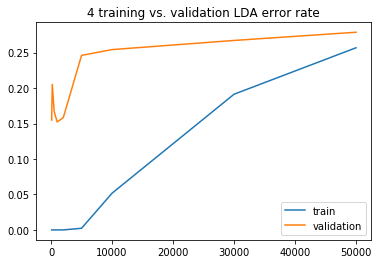

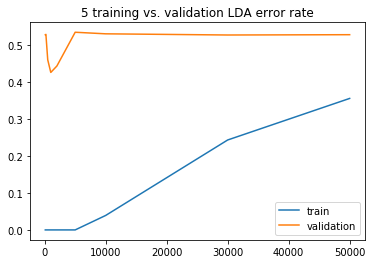

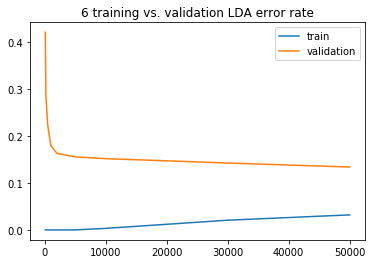

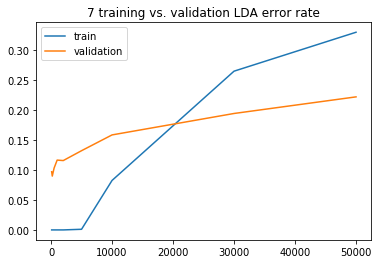

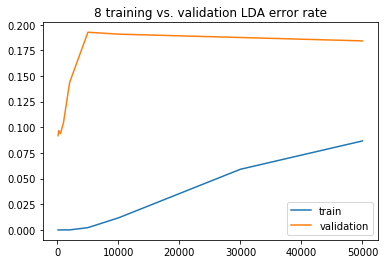

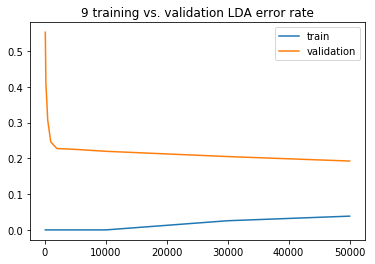

In [17]:
for label in np.unique(m_train_labels):
    plt.plot(train_size, t_c_error_l[label], label = 'train')
    plt.plot(train_size, v_c_error_l[label], label = 'validation')
    plt.title(str(label) + ' training vs. validation LDA error rate')
    plt.legend()
    plt.savefig(str(label) + ' training vs. validation LDA error rate' + '.png')
    plt.show()

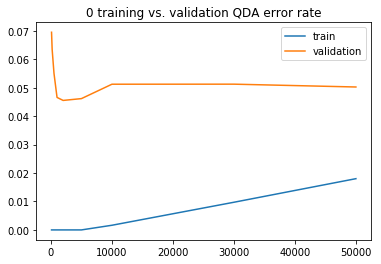

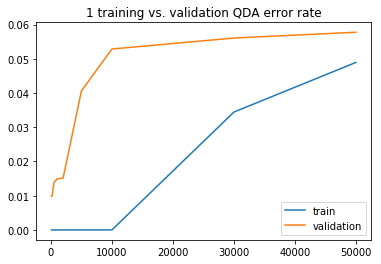

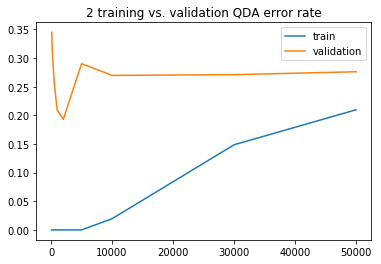

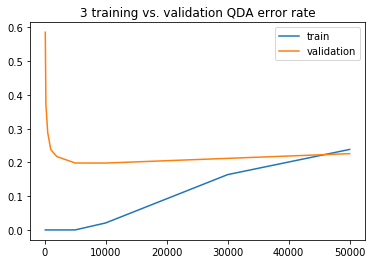

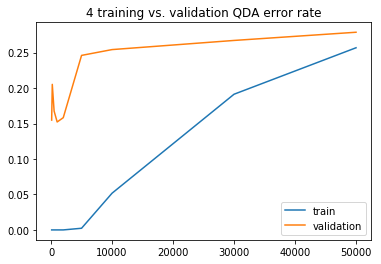

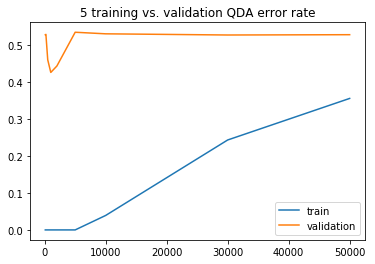

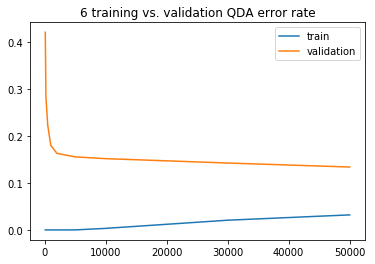

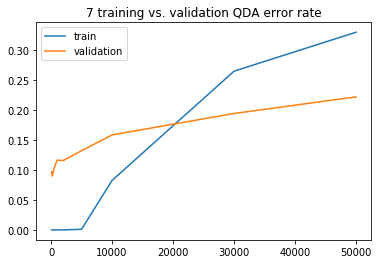

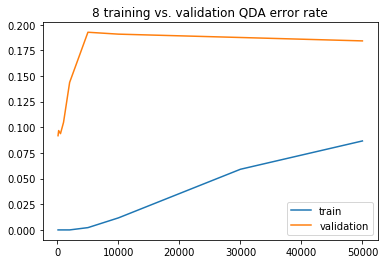

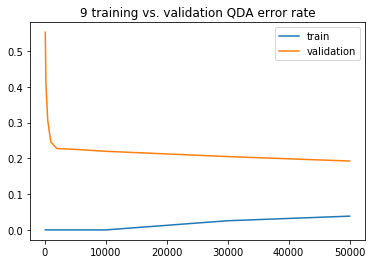

In [18]:
for label in np.unique(m_train_labels):
    plt.plot(train_size, t_c_error_q[label], label = 'train')
    plt.plot(train_size, v_c_error_q[label], label = 'validation')
    plt.title(str(label) + ' training vs. validation QDA error rate')
    plt.legend()
    plt.savefig(str(label) + ' training vs. validation QDA error rate' + '.png')
    plt.show()

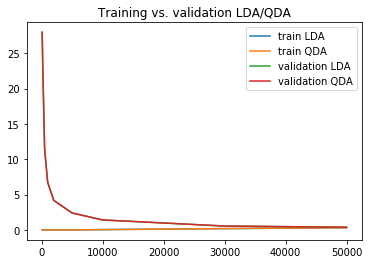

In [19]:
plt.plot(train_size, t_rates_l, label = 'train LDA')
plt.plot(train_size, t_rates_q, label = 'train QDA')
plt.plot(train_size, v_rates_l, label = 'validation LDA')
plt.plot(train_size, v_rates_q, label = 'validation QDA')
plt.title('Training vs. validation LDA/QDA')
plt.legend()
plt.savefig('training vs val.png')
plt.show()

Based on the plots one can say that either 0 or 1 is the easiest digit to classify.

In [20]:
mnist_pdfs = fit_gaussians(t_data, t_labels, epsilon)
lda = 0
t_labels_m = np.array(GDA(MNIST['test_data'], mnist_pdfs, lda, epsilon))

1000 predictions for data classified
2000 predictions for data classified
3000 predictions for data classified
4000 predictions for data classified
5000 predictions for data classified
6000 predictions for data classified
7000 predictions for data classified
8000 predictions for data classified
9000 predictions for data classified
10000 predictions for data classified


In [21]:
#D KAGGLE FOR SPAM
data_labels = list(zip(s_train_data, s_train_labels))
np.random.shuffle(data_labels)
s_data, s_labels = [],[]

for d, cs in data_labels:
    s_data.append(d)
    s_labels.append(cs[0])
s_data, s_labels = np.array(s_data), np.array(s_labels)
spam_pdfs = fit_gaussians(s_data, s_labels, epsilon)
t_labels_s = np.array(GDA(SPAM['test_data'], spam_pdfs, lda, epsilon))

C:\Users\Oscar Ortega\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


1000 predictions for data classified
2000 predictions for data classified
3000 predictions for data classified
4000 predictions for data classified
5000 predictions for data classified


In [22]:
# A code snippet to help you save your results into a kaggle accepted csv

# Usage results_to_csv(clf.predict(X_test))
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission.csv', index_label='Id')


In [23]:
results_to_csv(t_labels_s)